In [1]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astroquery
import glob
import astropy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.parse import urlencode
from urllib.request import urlretrieve

In [2]:
outpath='HAT-264-0001363.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

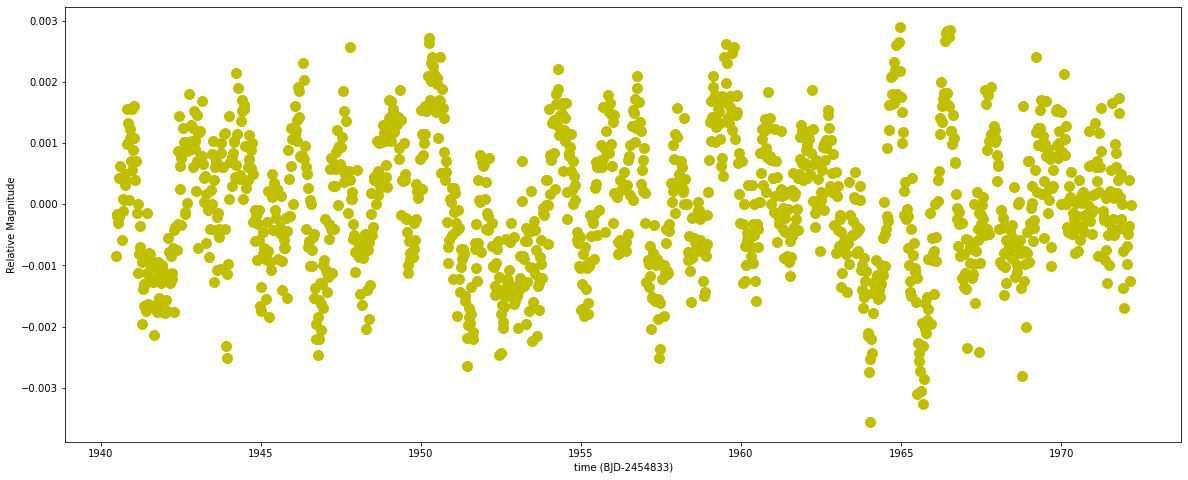

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-1363')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200901 15:37:29 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200901 15:37:29 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=data['col4']

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200901 15:37:32 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200901 15:37:32 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200901 15:37:36 nonphysical:216] spline fit done. nknots = 13,  chisq = 2276.41556, reduced chisq = 1.65799
[I 200901 15:37:36 png:696] plotting phased LC with period 1.703739, epoch 1947.66956
[I 200901 15:37:36 nonphysical:216] spline fit done. nknots = 13,  chisq = 2574.04628, reduced chisq = 1.87476
[I 200901 15:37:36 png:696] plotting phased LC with period 0.851870, epoch 1970.28747
[I 200901 15:37:36 nonphysical:216] spline fit done. nknots = 13,  chisq = 2237.68373, reduced chisq = 1.62978
[I 200901 15:37:36 png:696] plotting phased LC with period 3.407479, epoch 1940.90671
[I 200901 15:37:36 nonphysical:216] spline fit done. nknots = 13,  chisq = 2311.49666, reduced chisq = 1.68354
[I 200901 15:37:36 png:696] plotting phased LC with period 1.331494, epoch 1968.93896
[I 200901 15:37:36 nonphysical:216] spline fit done. nknots = 13,  chisq = 1989.32024, reduced chisq = 1.44889
[I 200901 15:37:36 png:696] plotting phased LC with period 5.281592, epoch 1970.10358
[I 200901 15:37

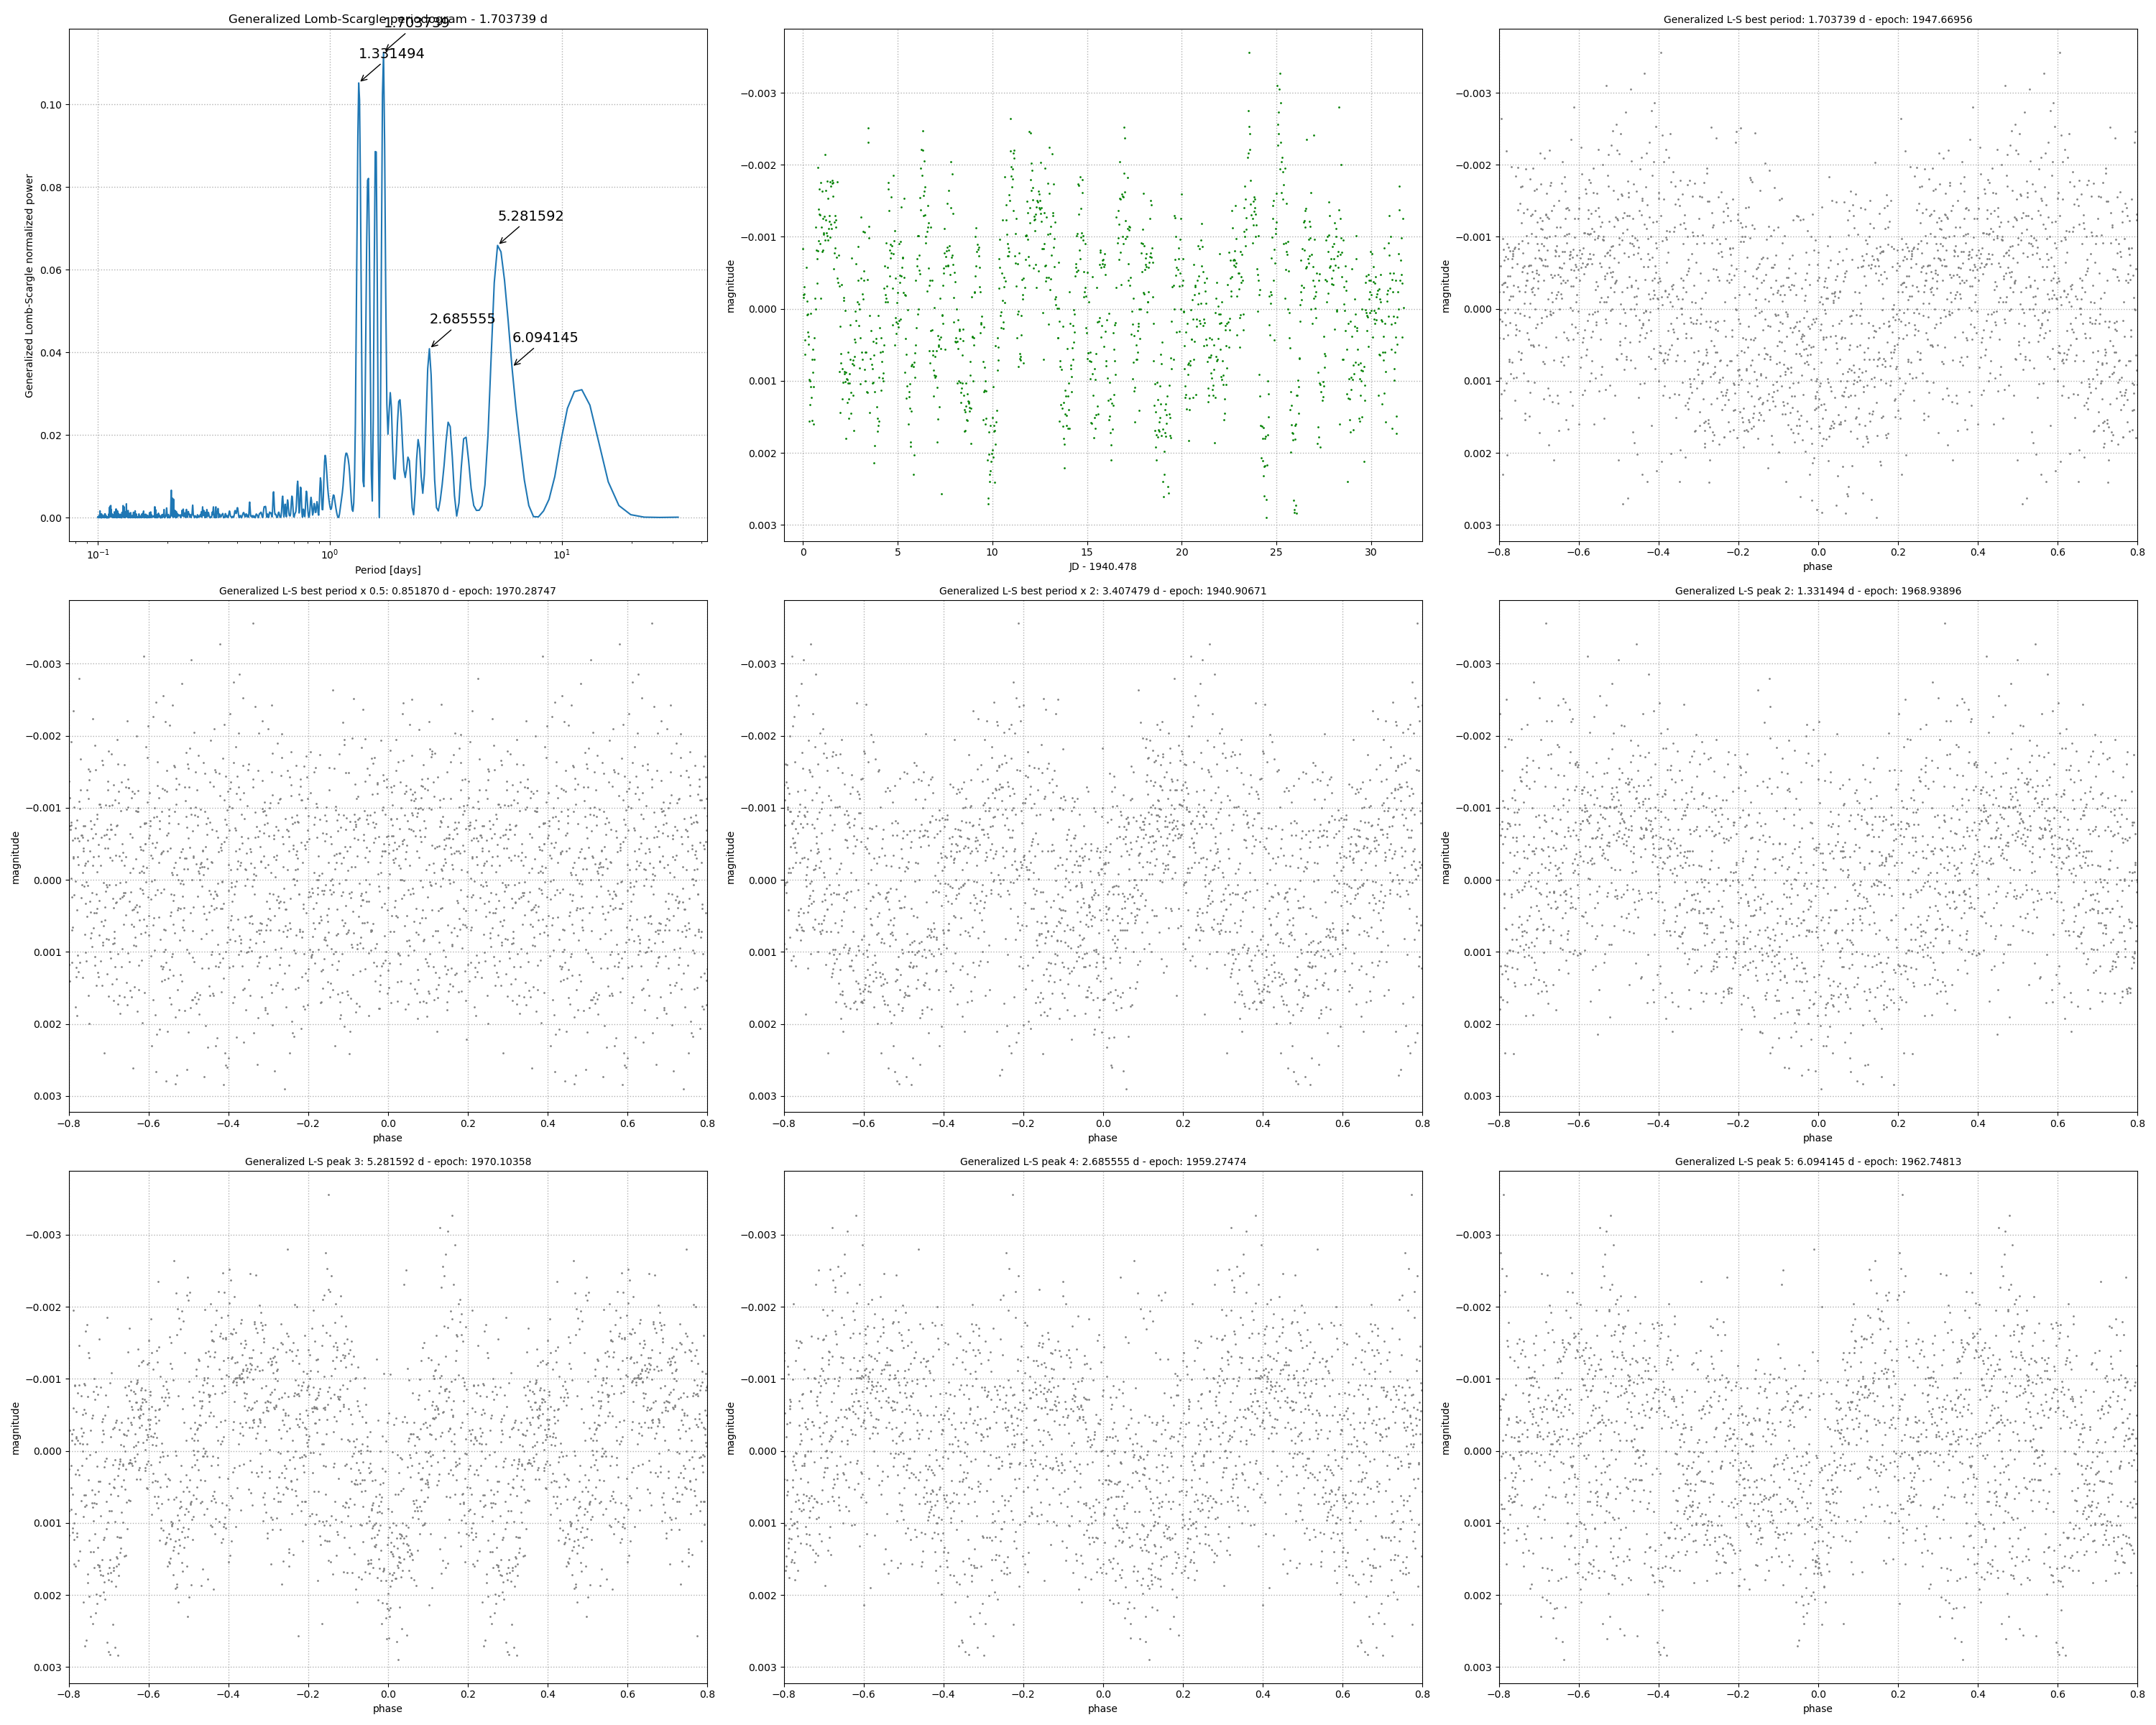

In [8]:
from IPython.display import Image
Image('0001363-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 1.7037394946236475,
 'bestlspval': 0.11260757236467014,
 'nbestpeaks': 5,
 'nbestlspvals': [0.11260757236467014,
  0.10520848617459673,
  0.0659027329966963,
  0.04090639442871486,
  0.0364601312603971],
 'nbestperiods': [1.7037394946236475,
  1.3314938907562959,
  5.281592433333307,
  2.6855554745762573,
  6.094145115384585],
 'lspvals': array([1.39742995e-04, 8.38474491e-05, 1.52125220e-04, ...,
        1.11938750e-05, 2.11238083e-05, 1.53361902e-04]),
 'omegas': array([ 0.19827307,  0.23792769,  0.2775823 , ..., 62.73359964,
        62.77325426, 62.81290887]),
 'periods': array([31.6895546 , 26.40796217, 22.63539614, ...,  0.10015662,
         0.10009335,  0.10003016]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [1.7037394946236475, 1.3314938907562959, 5.281592433333307, 2.6855554745762573, 6.094145115384585] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,startp=0.1,endp=30)

[I 200901 15:37:44 abls:919] min P: 0.1, max P: 30, nfreq: 126336, minfreq: 0.03333333333333333, maxfreq: 10.0
[I 200901 15:37:44 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889034830423312e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[I 200901 15:37:44 abls:980] using 6 workers...
[I 200901 15:37:44 abls:1090] worker 1: minfreq = 0.033333, nfreqs = 21056
[I 200901 15:37:44 abls:1090] worker 2: minfreq = 1.694449, nfreqs = 21056
[I 200901 15:37:44 abls:1090] worker 3: minfreq = 3.355564, nfreqs = 21056
[I 200901 15:37:44 abls:1090] worker 4: minfreq = 5.016679, nfreqs = 21056
[I 200901 15:37:44 abls:1090] worker 5: minfreq = 6.677794, nfreqs = 21056
[I 200901 15:37:44 abls:1090] worker 6: minfreq = 8.338909, nfreqs = 21056
[I 200901 15:37:44 abls:1092] running...


In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[I 200901 15:38:01 nonphysical:216] spline fit done. nknots = 13,  chisq = 2309.80862, reduced chisq = 1.68231
[I 200901 15:38:01 png:696] plotting phased LC with period 1.332120, epoch 1968.91853
[I 200901 15:38:01 nonphysical:216] spline fit done. nknots = 13,  chisq = 2575.80394, reduced chisq = 1.87604
[I 200901 15:38:01 png:696] plotting phased LC with period 0.666060, epoch 1943.13375
[I 200901 15:38:01 nonphysical:216] spline fit done. nknots = 13,  chisq = 2205.61830, reduced chisq = 1.60642
[I 200901 15:38:01 png:696] plotting phased LC with period 2.664239, epoch 1964.87304
[I 200901 15:38:01 nonphysical:216] spline fit done. nknots = 13,  chisq = 2324.72108, reduced chisq = 1.69317
[I 200901 15:38:01 png:696] plotting phased LC with period 1.581211, epoch 1966.20110
[I 200901 15:38:01 nonphysical:216] spline fit done. nknots = 13,  chisq = 2446.23891, reduced chisq = 1.78167
[I 200901 15:38:01 png:696] plotting phased LC with period 14.091646, epoch 1954.45287
[I 200901 15:3

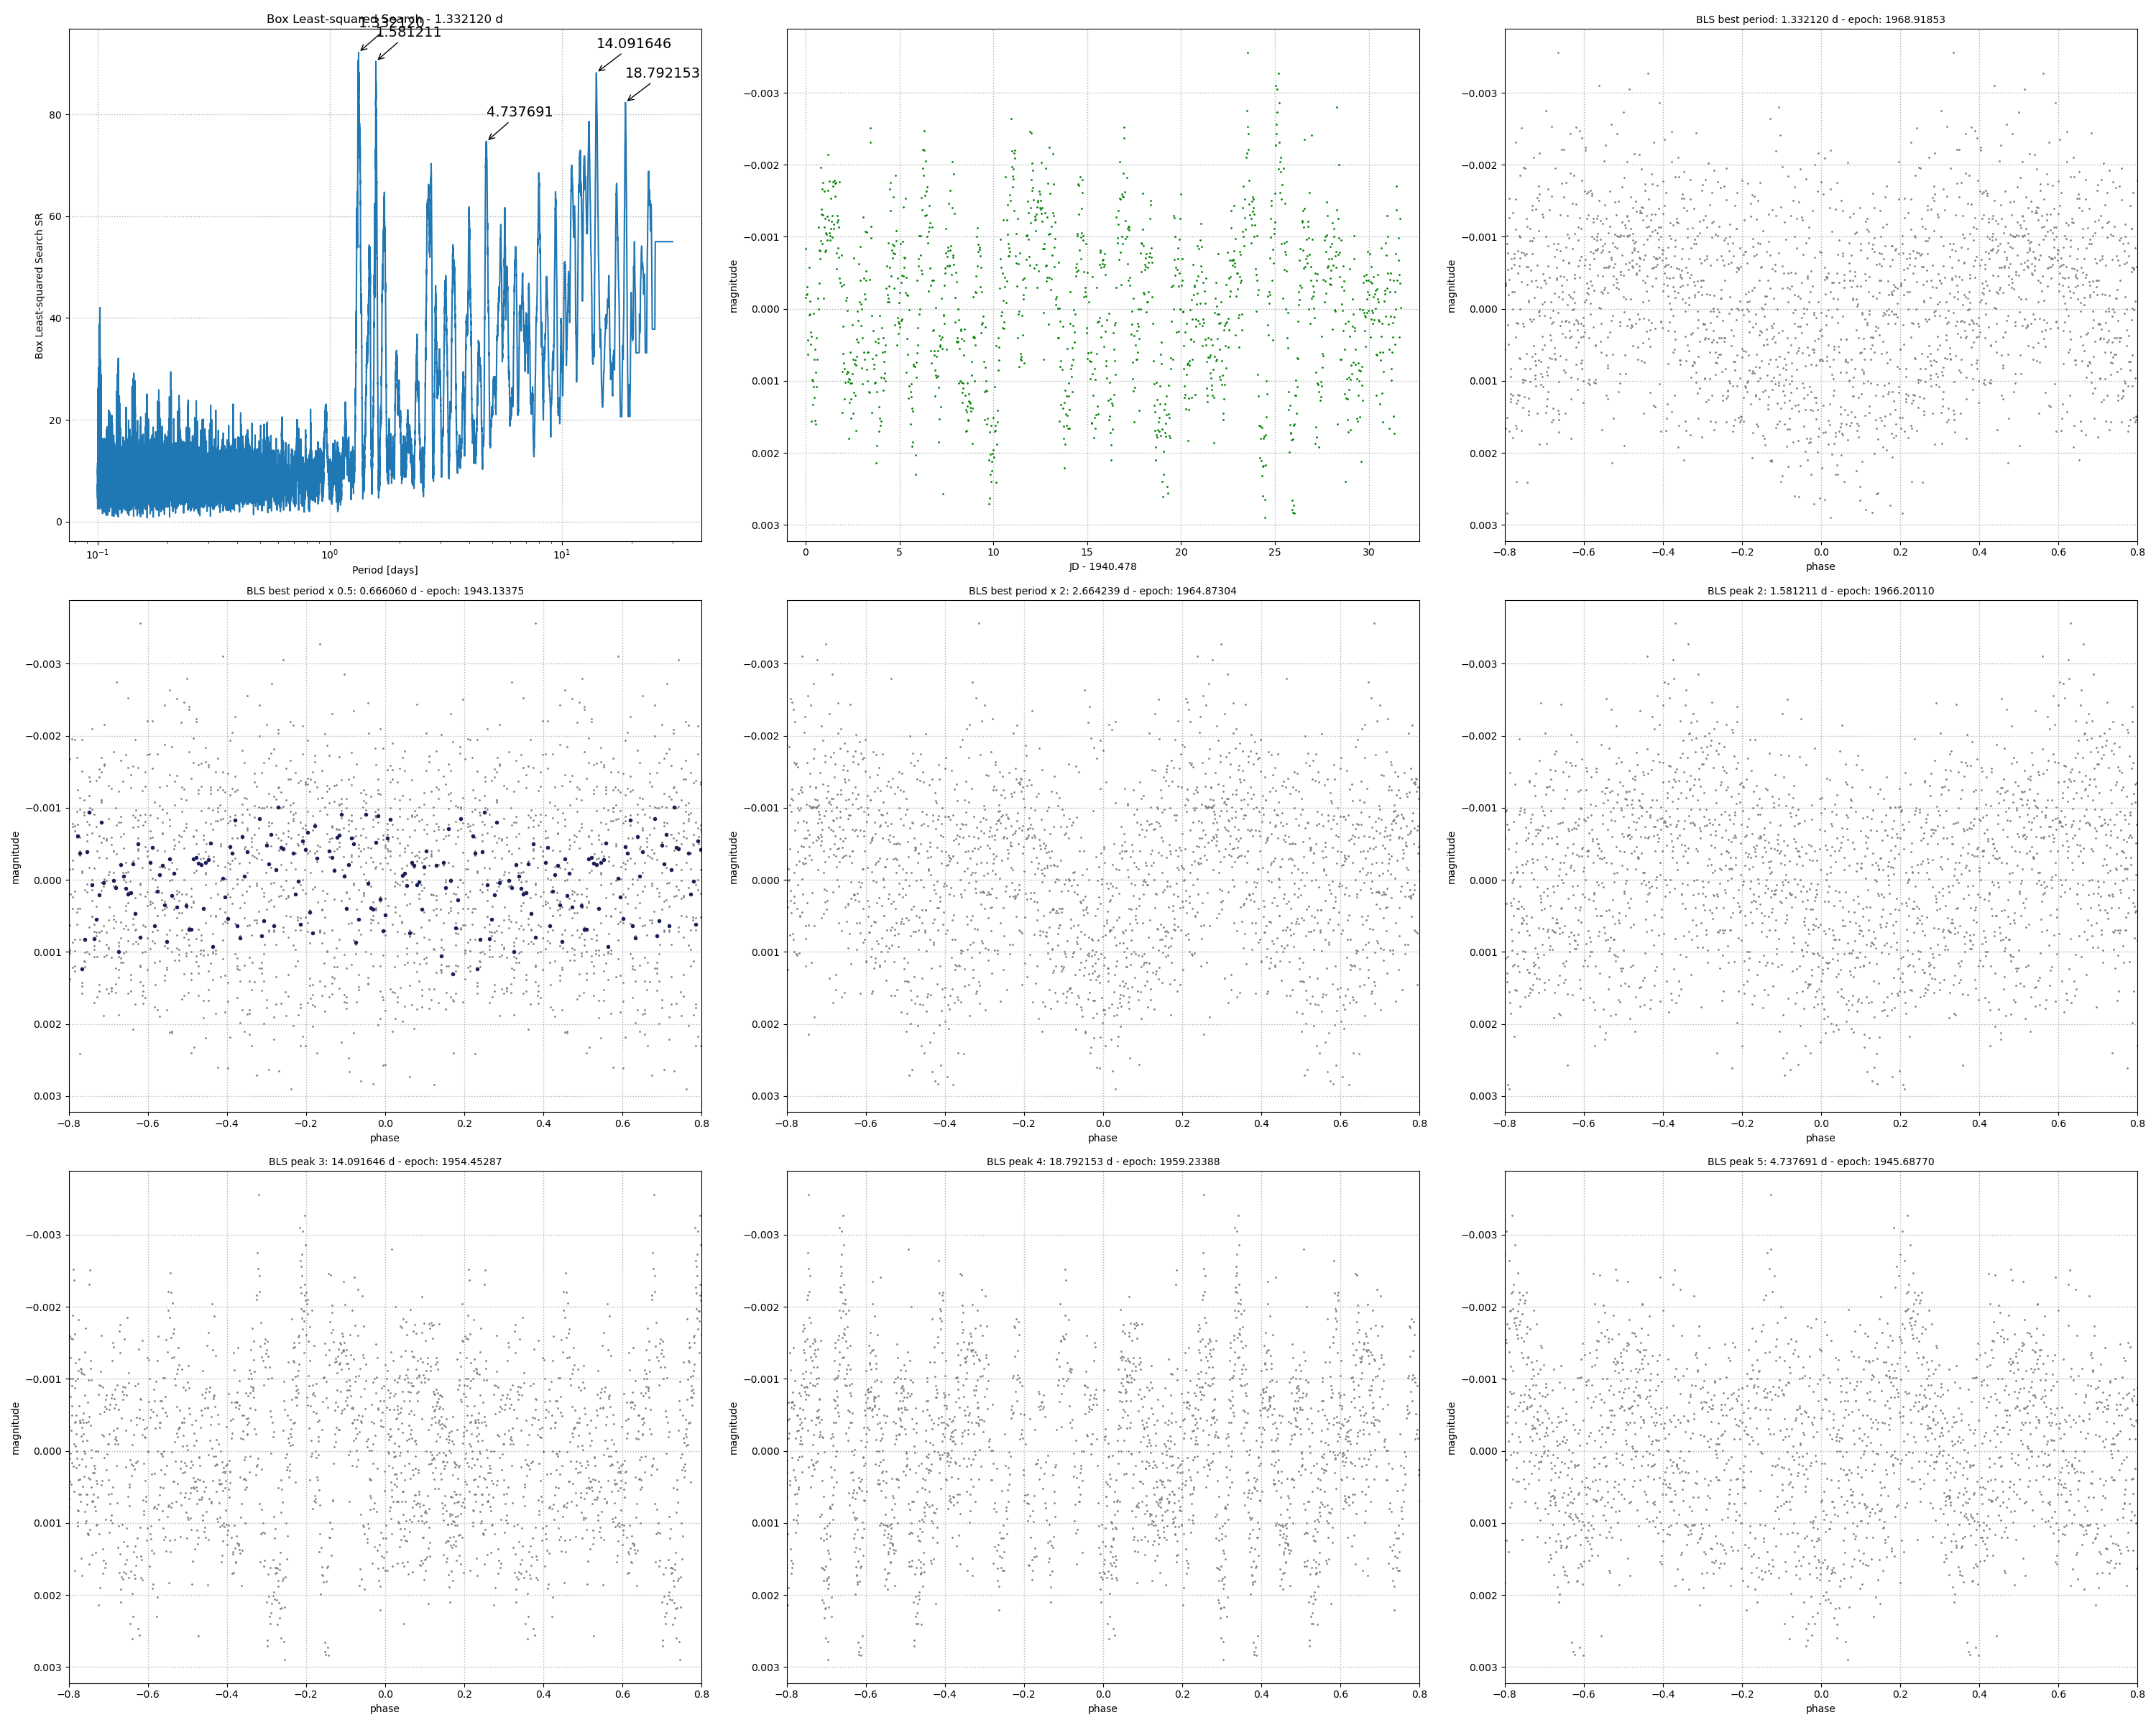

In [13]:
Image('0001363-checkplot-bls.png')

In [14]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200901 15:38:03 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200901 15:38:03 spdm:349] using 6 workers...


In [15]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200901 15:38:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 2229.87992, reduced chisq = 1.62409
[I 200901 15:38:07 png:696] plotting phased LC with period 15.844777, epoch 1943.41979
[I 200901 15:38:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 1911.77748, reduced chisq = 1.39241
[I 200901 15:38:07 png:696] plotting phased LC with period 7.922389, epoch 1956.78208
[I 200901 15:38:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 2321.62740, reduced chisq = 1.69092
[I 200901 15:38:07 png:696] plotting phased LC with period 31.689555, epoch 1940.68196
[I 200901 15:38:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 1911.77748, reduced chisq = 1.39241
[I 200901 15:38:07 png:696] plotting phased LC with period 7.922389, epoch 1956.78208
[I 200901 15:38:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 2158.93835, reduced chisq = 1.57242
[I 200901 15:38:07 png:696] plotting phased LC with period 12.188290, epoch 1964.85260
[I 200901 15

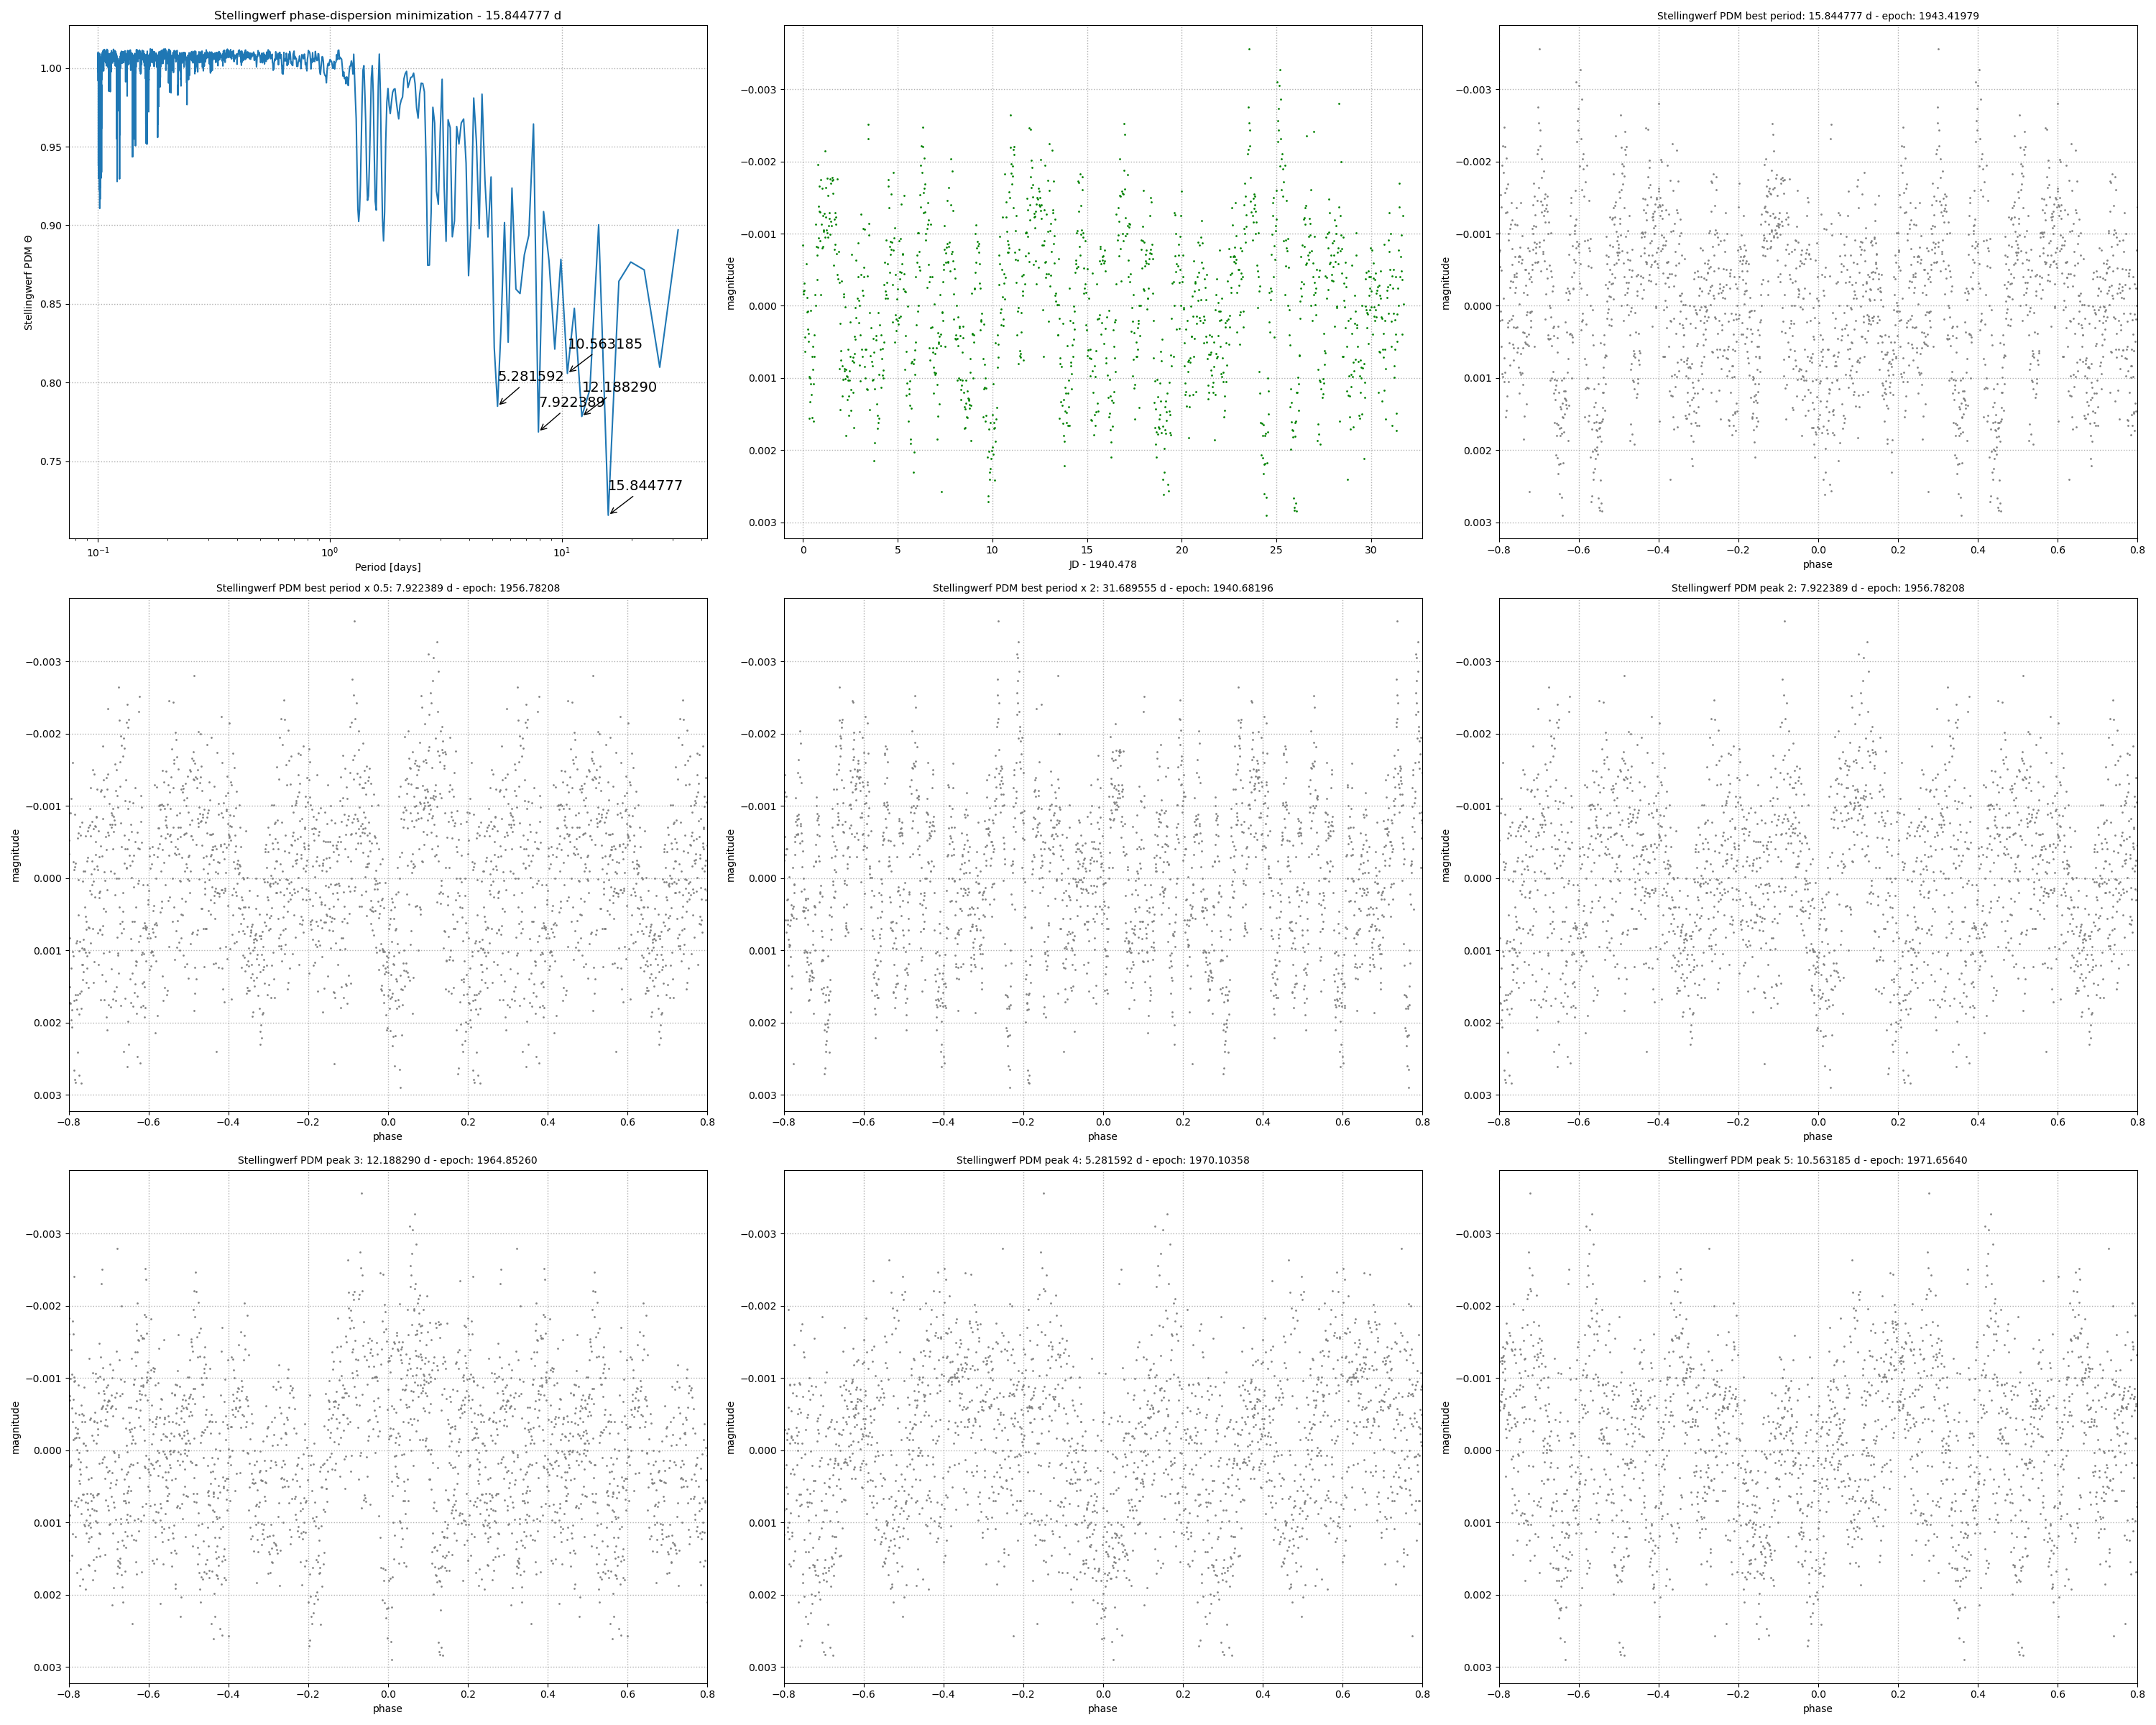

In [16]:
Image('0001363-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [15.84477729999992, 7.92238864999996, 12.18829023076917, 5.281592433333307, 10.563184866666612] (days)


In [18]:
df=pd.read_table('/Users/kornk/OneDrive/Documents/GitHub/UW-Lightcurves/K2Campaign0SuperStampLCs/photref.cat',sep='\s+')
HATID='HAT-264-0001363'
itemindex = np.where(df['HATID']==HATID)
print(itemindex[0])
RA=float(df.RA[itemindex[0]])
DEC=float(df.DEC[itemindex[0]])
print(RA,DEC)

[6804]
92.6344933 24.141100299999998


In [19]:
fileout='0001363.pkl'
cpf = checkplot.checkplot_pickle([glsp,spdm,bls],dates,fluxes,errs,outfile=fileout,objectinfo={'ra': RA,'decl': DEC})

[W 200901 15:38:08 pkl:604] adding a randomly generated objectid since none was provided in objectinfo dict
[I 200901 15:38:08 pkl_utils:415] adding in object information and finder chart for 38550 at RA: 92.634, DEC: 24.141
[I 200901 15:38:08 plotbase:964] fetched stamp successfully for (92.634, 24.141)
[W 200901 15:38:08 pkl_utils:765] pmRA not found in provided objectinfo dict, using value from GAIA
[W 200901 15:38:08 pkl_utils:783] pmDEC not found in provided objectinfo dict, using value from GAIA
[I 200901 15:38:08 mast:327] getting cached MAST query result for request: {'format': 'json', 'params': {'ra': 92.6344933, 'dec': 24.141100299999998, 'radius': 0.0013888888888888887}, 'service': 'Mast.Catalogs.Tic.Cone', 'timeout': 180.0}
[W 200901 15:38:08 pkl:661] times is an astropy.table.Column object, changing to numpy array because of potential unpickling issues
[W 200901 15:38:08 pkl:666] mags is an astropy.table.Column object, changing to numpy array because of potential unpicklin

[I 200901 15:38:12 pkl_png:1076] checkplot pickle -> checkplot PNG: checkplot-pickle.png OK


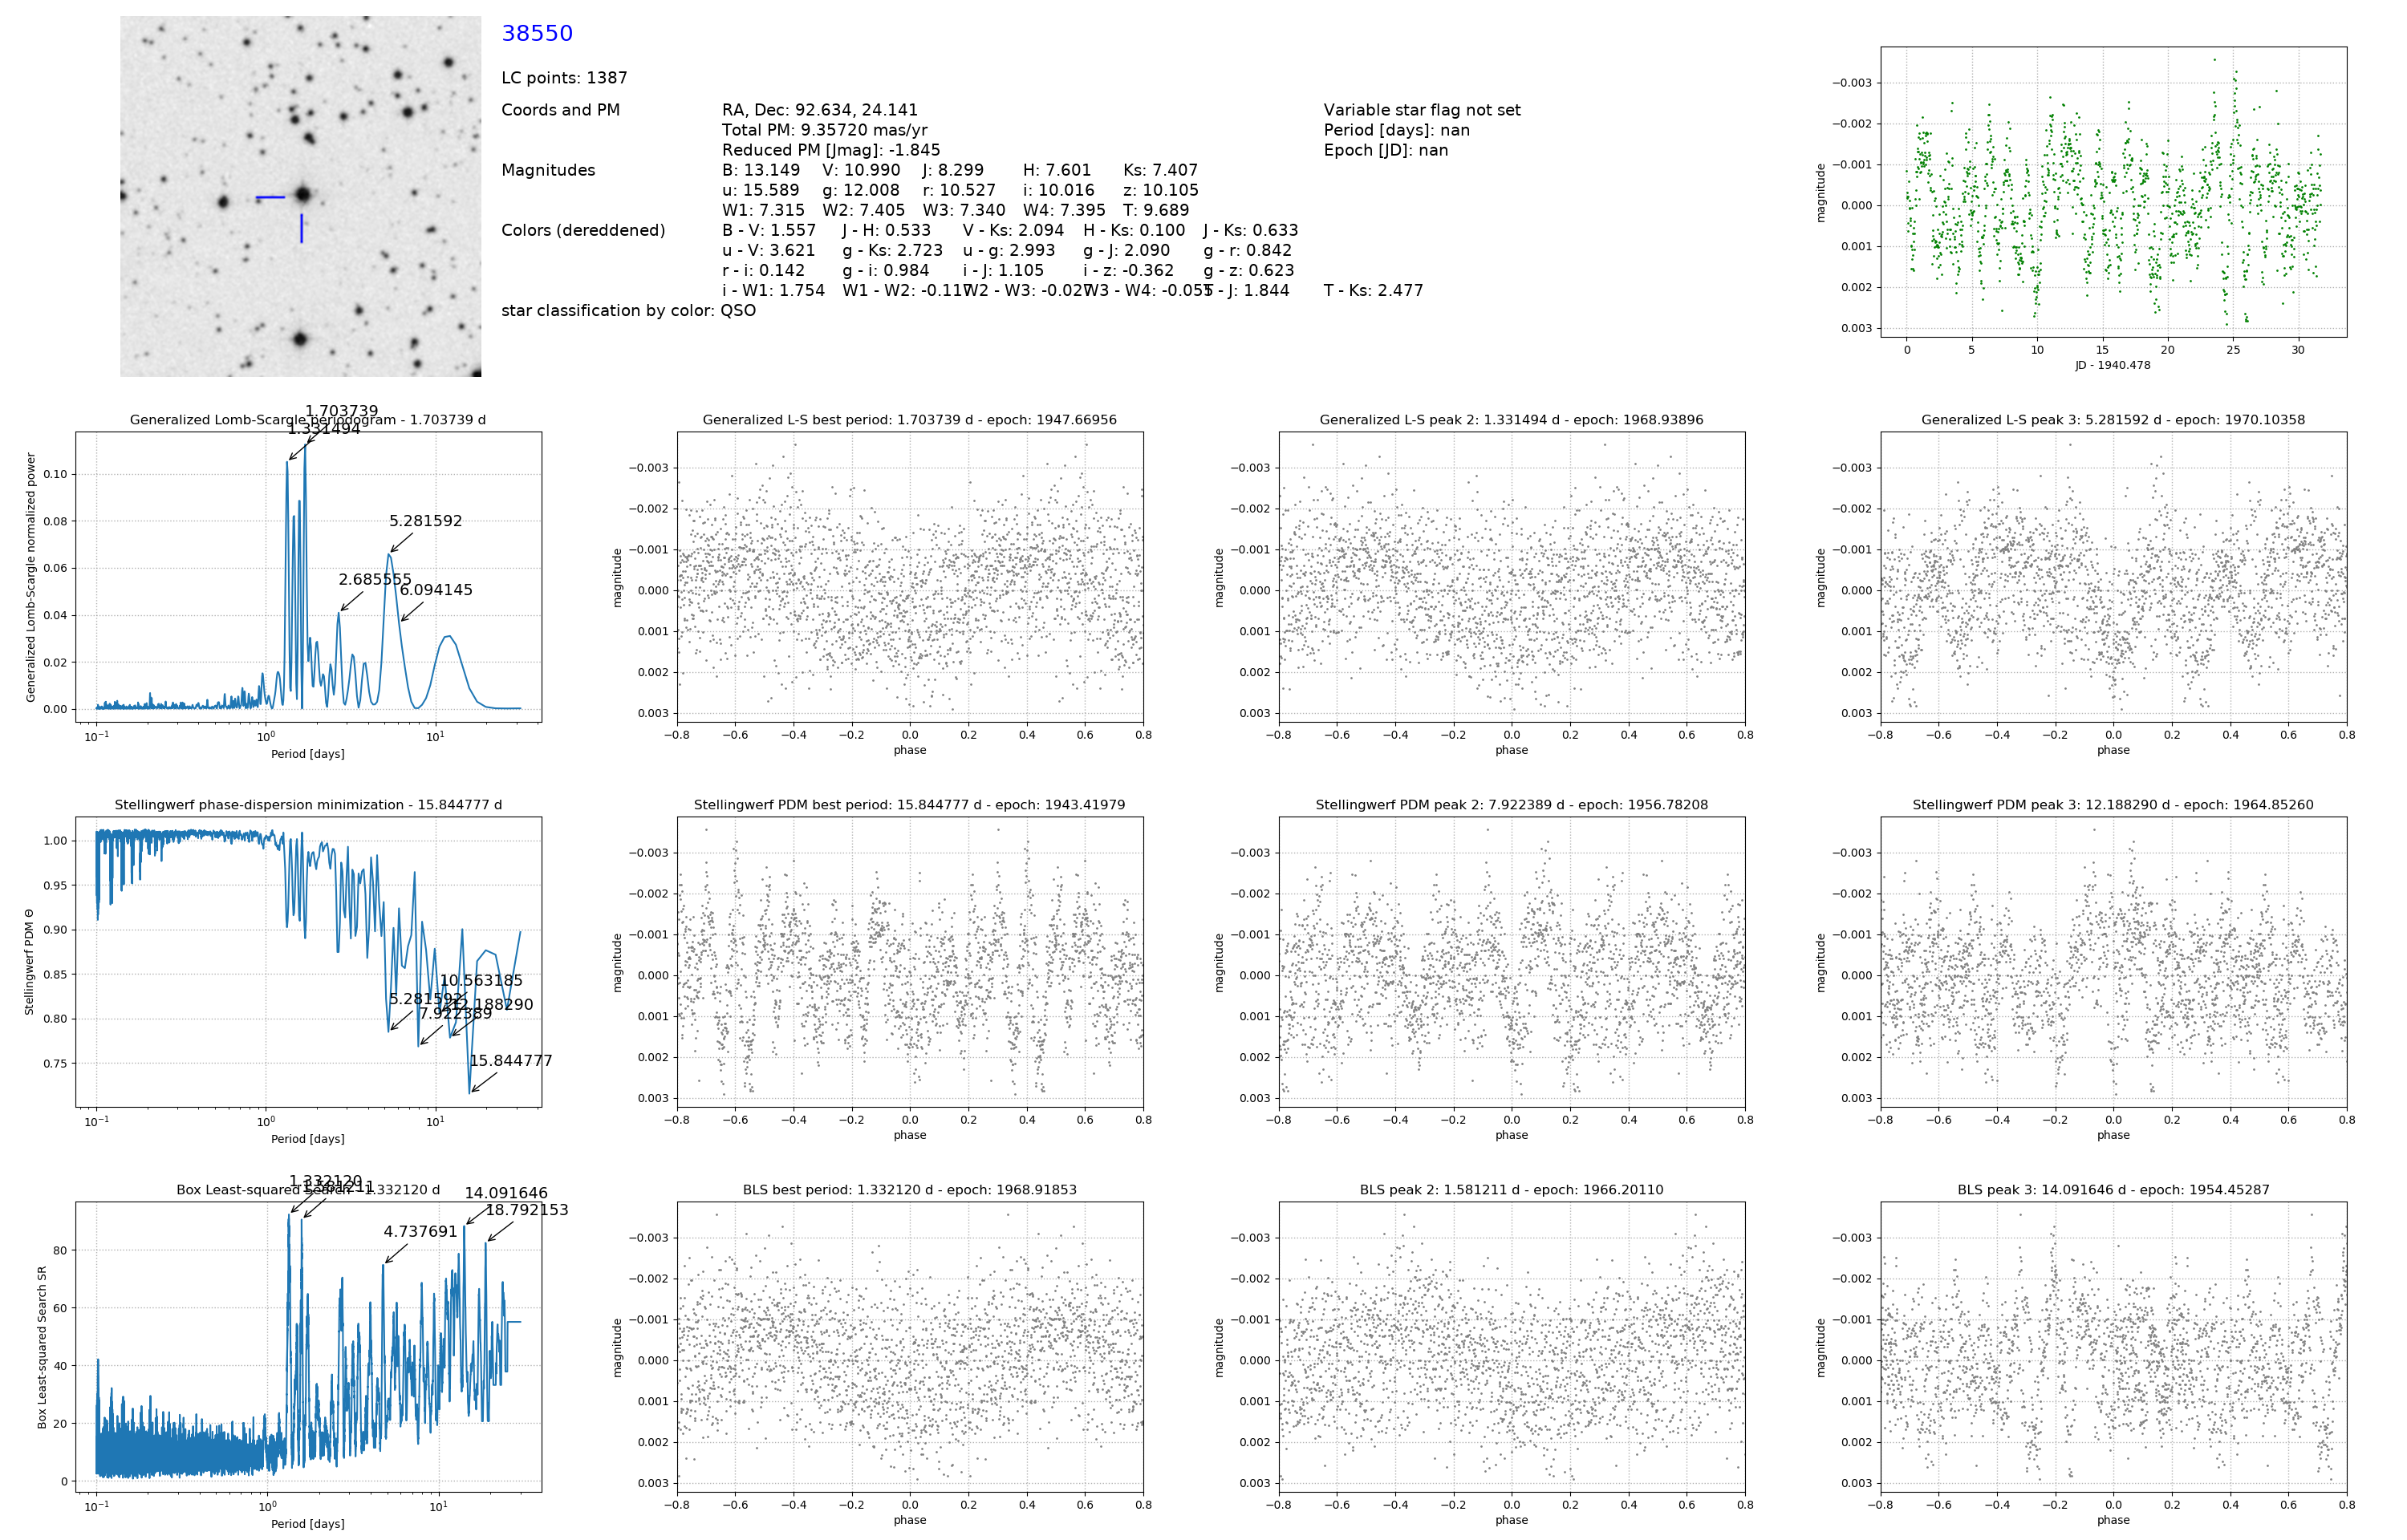

In [20]:
cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
Image('0001363-checkplot-pickle.png')

In [21]:
t=Table(names=('GaiaID', 'RA','DEC','Teff','Lum','Rad','Mass'), dtype=('f4','f4', 'f4','f4','f4','f4','f4'))
RA=92.6344933
DEC=24.141100299999998
coords=str(RA)+' '+str(DEC)
from astroquery.vizier import Vizier
from astropy import coordinates
v = Vizier()
c = coordinates.SkyCoord(coords,unit=('deg','deg'),frame='icrs')

In [37]:
print(result[0])

    RA_ICRS     e_RA_ICRS     DE_ICRS     ... E_BP-RP_  Rad      Lum   
      deg          mas          deg       ...   mag     Rsun     Lsun  
--------------- --------- --------------- ... -------- ------ ---------
 92.63454180855    0.0365  24.14110531836 ...   0.3640  19.29    98.453


In [44]:
print(result['Teff'][0])

TypeError: TableLists can only be indexed with the named keys and integers.

In [43]:
result =v.query_region(c,radius=3*u.arcsec,catalog='I/345/gaia2')
for ii in result:
    if ii == 'Teff':
        print(ii)

C:\Users\kornk\anaconda3\lib\site-packages\astropy\table\table.py:3067: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = (self.as_array().data == other) & (self.mask == false_mask)
